1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


<Figure size 800x600 with 0 Axes>

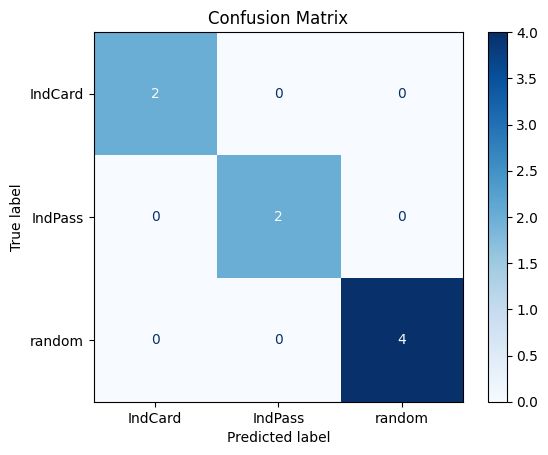

In [4]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Class mapping (ensure order matches your training process)
class_mapping = {
    0: 'IndCard',
    1: 'IndPass',
    2: 'random'
}

classification_model_path = 'models/model1.h5'
classification_model = tf.keras.models.load_model(classification_model_path)

# Reverse mapping for class labels
reverse_mapping = {v: k for k, v in class_mapping.items()}

# Test dataset directory
test_dir = "dataset/test"

# Initialize lists for true labels and predictions
true_labels = []
predicted_labels = []

# Load and preprocess images
for class_name in os.listdir(test_dir):  # Iterate over class folders
    class_path = os.path.join(test_dir, class_name)
    if os.path.isdir(class_path):
        for img_file in os.listdir(class_path):
            img_path = os.path.join(class_path, img_file)
            
            # Load and preprocess image
            img = image.load_img(img_path, target_size=(500, 500))
            img_array = image.img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0)
            img_array = tf.keras.applications.imagenet_utils.preprocess_input(img_array)

            # Predict class
            predictions = classification_model.predict(img_array)
            predicted_class_index = np.argmax(predictions, axis=1)[0]

            # Store true and predicted labels
            true_labels.append(reverse_mapping[class_name])  # True class index
            predicted_labels.append(predicted_class_index)   # Predicted class index

# Create confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_mapping.values())

# Plot confusion matrix
plt.figure(figsize=(8, 6))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()
